# Let's perform K-means cluster analysis on the data

In [2]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy
import seaborn as sns

np.set_printoptions(precision=3)

In [3]:
train = pd.read_csv("C:/Users/sundu/OneDrive - The University of Chicago/Documents/Winter 2023/Data Mining/x_train.csv")
test = pd.read_csv("C:/Users/sundu/OneDrive - The University of Chicago/Documents/Winter 2023/Data Mining/x_test.csv")

train = train.replace({'yes': 1, 'no': 0})
test = test.replace({'yes': 1, 'no': 0})

In [4]:
train

col_0     col_1     col_2  col_3     col_4     col_5    col_6  col_7  \
0     0.000000  0.000000  0.000000    1.0  0.000000  0.000000  0.00000    0.0   
1     0.000000  0.000000  0.000000    0.0  1.000000  0.000000  0.00000    0.0   
2     0.000000  1.000000  0.000000    0.0  0.000000  0.000000  0.00000    0.0   
3     0.000000  0.000000  1.000000    0.0  0.000000  0.000000  0.00000    0.0   
4     0.000000  0.000000  0.000000    0.0  1.000000  0.000000  0.00000    0.0   
...        ...       ...       ...    ...       ...       ...      ...    ...   
5095  0.212546  0.000000  0.000000    0.0  0.000000  0.787454  0.00000    0.0   
5096  0.399950  0.000000  0.000000    0.0  0.000000  0.000000  0.60005    0.0   
5097  0.497638  0.000000  0.502362    0.0  0.000000  0.000000  0.00000    0.0   
5098  0.000000  0.954904  0.000000    0.0  0.045096  0.000000  0.00000    0.0   
5099  0.000000  0.000000  1.000000    0.0  0.000000  0.000000  0.00000    0.0   

      account_length  international_plan  ...  total_night_minutes  \
0          87.000000            0.000000  ...           184.700000   
1         113.000000            0.000000  ...           204.300000   
2          75.000000            0.000000  ...           235.400000   
3         119.000000            0.000000  ...           147.600000   
4          91.000000            0.000000  ...           280.500000   
...              ...                 ...  ...                  ...   
5095       66.588936            0.787454  ...           157.719561   
5096       52.000756            0.000000  ...           127.757183   
5097      123.009448            0.497638  ...           237.230867   
5098       95.450960            1.000000  ...           204.441598   
5099       57.671457            0.000000  ...           232.378882   

      total_night_calls  total_night_charge  total_intl_minutes  \
0             50.000000            8.310000           14.700000   
1            115.000000            9.190000           10.700000   
2            116.000000           10.590000            8.500000   
3             76.000000            6.640000            7.600000   
4             89.000000           12.620000            5.900000   
...                 ...                 ...                 ...   
5095         109.073055            7.097912            9.906273   
5096          97.599546            5.747873            9.659955   
5097         125.047242           10.674126           11.089134   
5098          82.811729            9.200237            4.510374   
5099          97.063872           10.453234           10.198044   

      total_intl_calls  total_intl_charge  number_customer_service_calls  \
0             6.000000           3.970000                       1.000000   
1             2.000000           2.890000                       3.000000   
2             5.000000           2.300000                       0.000000   
3             3.000000           2.050000                       3.000000   
4             2.000000           1.590000                       0.000000   
...                ...                ...                            ...   
5095          3.212546           2.677631                       1.000000   
5096          2.399950           2.605988                       2.399950   
5097          4.014173           2.997071                       1.995276   
5098          2.180384           1.220485                       0.045096   
5099          4.632335           2.755737                       1.245110   

      area_code_408  area_code_415  area_code_510  
0          0.000000       1.000000       0.000000  
1          0.000000       0.000000       1.000000  
2          0.000000       1.000000       0.000000  
3          0.000000       1.000000       0.000000  
4          1.000000       0.000000       0.000000  
...             ...            ...            ...  
5095       0.000000       1.000000       0.000000  
5096       0.000000       1.000000       0.000000  
5097     

In [5]:
cluster_train = train[['account_length', 'international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']]
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(cluster_train)

# Convert the scaled data back to a DataFrame
cluster_train_scaled = pd.DataFrame(scaled_data, columns=cluster_train.columns)

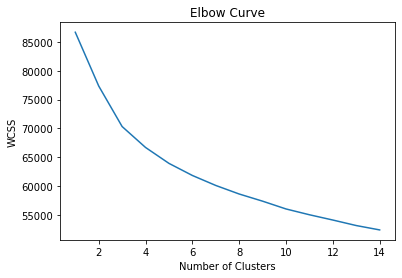

In [6]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 15), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### From the elbow, picking k=3 as the optimal number of clusters

In [7]:
k=3
kmeanModel=KMeans(n_clusters=k, n_init=100, max_iter=300, tol=0.0001, verbose=0,random_state = 123).fit(cluster_train_scaled)
centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_
cluster_sizes_train = np.bincount(labels)
predicted_data= kmeanModel.fit_predict(cluster_train_scaled)

In [8]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(cluster_train_scaled, predicted_data)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.11286285266254036


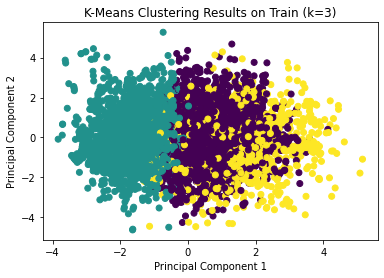

In [9]:
pca = PCA(n_components=2)
pca.fit(cluster_train_scaled)
cluster_train_pca = pca.transform(cluster_train_scaled)

# Plot the data points with different colors according to their assigned cluster labels
plt.scatter(cluster_train_pca[:, 0], cluster_train_pca[:, 1], c=kmeanModel.labels_, cmap='viridis')
plt.title('K-Means Clustering Results on Train (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Now, let's see on the test data

In [10]:
cluster_test = test[['account_length', 'international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']]

In [11]:
scaler = StandardScaler()
# Scale the data
scaled_dat = scaler.fit_transform(cluster_test)

# Convert the scaled data back to a DataFrame
cluster_test_scaled = pd.DataFrame(scaled_dat, columns=cluster_test.columns)

In [12]:
k=3
x_test=KMeans(n_clusters=k, n_init=100, max_iter=300, tol=0.0001, verbose=0,random_state = 123).fit(cluster_test_scaled)
predict_test = x_test.fit_predict(cluster_test_scaled)
centroids_test = x_test.cluster_centers_
labels_test = x_test.labels_
cluster_sizes_test = np.bincount(labels_test)

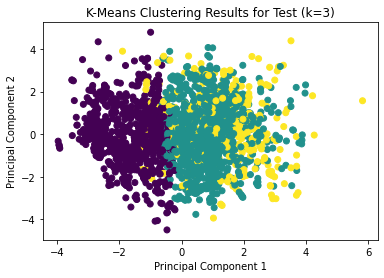

In [13]:
pca = PCA(n_components=2)
pca.fit(cluster_test_scaled)
cluster_test_pca = pca.transform(cluster_test_scaled)
#rev_centroids = scaler.inverse_transform(centroids)

# Plot the data points with different colors according to their assigned cluster labels
plt.scatter(cluster_test_pca[:, 0], cluster_test_pca[:, 1], c=x_test.labels_, cmap='viridis')
#plt.plot(rev_centroids[:,1],rev_centroids[:,3], marker='*', ls='none', ms=15, color='red')
#plt.scatter(x.cluster_centers_[:, 0], x.cluster_centers_[:, 1], marker='*', s=200, c='red')
plt.title('K-Means Clustering Results for Test (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [14]:
silhouette_avg_test = silhouette_score(cluster_test_scaled, predict_test)
print("Silhouette score:", silhouette_avg_test)

Silhouette score: 0.12375545240926074


In [15]:
print('Centroids of train:\n', centroids, '\n')
print('Centroids of test:\n', centroids_test, '\n')

print('Mean difference in centroids:\n', np.mean(centroids - centroids_test),'\n')

print('Cluster sizes of train:\n', cluster_sizes_train, '\n')
print('Cluster sizes of test:\n', cluster_sizes_test, '\n')

print('Cluster sizes of train proportional to train size:\n', cluster_sizes_train * (1/len(cluster_train_scaled)), '\n')
print('Cluster sizes of test proportional to test size:\n', cluster_sizes_test * (1/len(cluster_test_scaled)), '\n')

Centroids of train:
 [[ 0.014  0.057 -0.449 -0.455 -0.629  0.012 -0.629 -0.415  0.114 -0.415
  -0.223  0.024 -0.223 -0.025 -0.102 -0.025 -0.042]
 [-0.059 -0.069 -0.5   -0.464  0.865 -0.01   0.864  0.546 -0.147  0.546
   0.298 -0.04   0.298  0.026  0.116  0.026  0.079]
 [ 0.079  0.003  1.934  1.879 -0.226 -0.007 -0.224 -0.102  0.021 -0.102
  -0.062  0.021 -0.063  0.006  0.009  0.006 -0.054]] 

Centroids of test:
 [[-0.041 -0.002 -0.427 -0.425  0.885  0.051  0.885  0.624  0.01   0.624
   0.397  0.135  0.397 -0.127  0.004 -0.126  0.095]
 [ 0.009  0.065 -0.417 -0.421 -0.599 -0.045 -0.599 -0.435 -0.024 -0.435
  -0.254 -0.127 -0.254  0.087 -0.028  0.087 -0.024]
 [ 0.062 -0.175  2.054  2.061 -0.204  0.016 -0.204 -0.111  0.044 -0.111
  -0.132  0.067 -0.132  0.026  0.069  0.026 -0.132]] 

Mean difference in centroids:
 -0.013464905912671903 

Cluster sizes of train:
 [2222 1877 1001] 

Cluster sizes of test:
 [ 788 1041  375] 

Cluster sizes of train proportional to train size:
 [0.436 0.368 0.

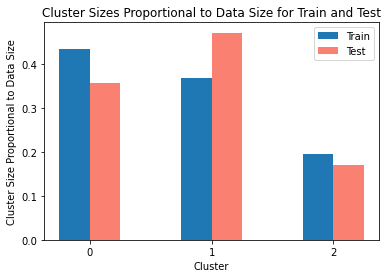

In [16]:
N = k
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, cluster_sizes_train * (1/len(train)), width)
  
bar2 = plt.bar(ind+width, cluster_sizes_test * (1/len(test)), width, color = 'salmon')
  
plt.xlabel("Cluster")
plt.ylabel('Cluster Size Proportional to Data Size')
plt.title("Cluster Sizes Proportional to Data Size for Train and Test")
  
plt.xticks(ind+width*.5,ind)
plt.legend( (bar1, bar2), ('Train', 'Test') )
plt.show()

In [17]:
data_with_labels = pd.concat([cluster_train, pd.Series(labels, name='Cluster')], axis=1)

grouped_data = data_with_labels.groupby('Cluster').agg(['mean', 'std'])

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Print the results
print(grouped_data)

        account_length            international_plan            \
                  mean        std               mean       std   
Cluster                                                          
0           100.552906  36.927511           0.182029  0.350427   
1            97.808454  36.937374           0.140207  0.303866   
2           102.974074  39.334371           0.164230  0.344793   

        voice_mail_plan           number_vmail_messages            \
                   mean       std                  mean       std   
Cluster                                                             
0              0.032562  0.139922              0.337540  1.747551   
1              0.012445  0.085546              0.243473  1.695695   
2              0.964826  0.099549             25.995219  8.527883   

        total_day_minutes            total_day_calls             \
                     mean        std            mean        std   
Cluster                                               

### Is clustering optimal for this data?

In general, a silhouette score close to 1 indicates that the clustering solution is well-separated and that the data points within each cluster are very similar to each other. A score close to 0 may indicate that the clustering solution is not optimal or that some of the data points are on or close to the decision boundary between clusters. A negative score indicates that the data points may have been assigned to the wrong cluster.

Even though visually inspecting the clusters show us there is some level of clustering (into at least 2 clear clusters), we had a silhouette score of 0.11286 in the train and 0.12375 in the test data, indicating that the clustering method is <b>sub-optimal</b> for this data.

All the variables are similarly distributed in each cluster, except for *voice_mail_plan* and *number_vmail_messages* in the case of Cluster 3. So, customers in Cluster 3 are people who expect to receive a decent number of voice mails and have included this in their phone plan. 
    
Moreover, looking at the average *total_day_charge*, we can see that cluster 1 has the lowest cost, cluster 3 in the middle and cluster 2 customers having the highest charge. 